# Reports:Correlation between vehicle counting point and  with respect to Accident in Cologne

# Contents :

1.Introduction

2.Data Source

3.Installation of dependencies

4.Load Data

5.Questions

6.Conclusion

7.Scope for further improvemnt

# Introduction

The correlation between the two datasets, global sea level change (2000-2021) and the GISS Surface Temperature Analysis version 4 (GISTEMP v4), can provide insights into the relationship between rising sea levels and global surface temperature changes during the specified period.

A positive correlation may suggest that as global surface temperatures increase, there is a corresponding rise in sea levels. This correlation could be indicative of the influence of global warming on both the thermal expansion of seawater and the melting of ice sheets and glaciers, contributing to the observed sea level changes.

Conversely, a weaker or negative correlation might indicate that other factors, such as local geological processes or regional variations, are playing a more dominant role in driving sea level changes during this specific timeframe.

# Data Source

### Datasource1: NASA (GISTEMP)
* Metadata URL: https://data.giss.nasa.gov/gistemp/
* Data URL: https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv
* Data Type: CSV

Northern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies

### Datasource2: NASA (GISTEMP)
* Metadata URL: https://data.giss.nasa.gov/gistemp/
* Data URL: https://data.giss.nasa.gov/gistemp/tabledata_v4/SH.Ts+dSST.csv
* Data Type: CSV

Southern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies

### Datasource3: NASA.GOV
* Metadata URL: https://climate.nasa.gov/
* Data URL: https://www.kaggle.com/datasets/kkhandekar/global-sea-level-1993-2021/data                                                                       
* Data Type: CSV

Change in sea level since 1993 as observed by satellites

# Installation of dependencies

In [66]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy==1.4.46
%pip install nbformat
%pip install matplotlib
%pip install Jinja2
%pip install scipy


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB ? eta -:--:--
     -------------------------------------- 60.4/60.4 kB 456.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/46.2 MB 7.0 MB/s eta 0:00:07
   ---------------------------------------- 0.3/46.2 MB 4.9 MB/s eta 0:00:10
   ---------------------------------------- 0.4/46.2 MB 4.5 MB/s eta 0:00:11
    --------------------------------------- 0.6/46.2 MB 3.7 MB/s eta 0:00:13
    --------------------------------------- 0.8/46.2 MB 3.6 MB/s eta 0:00:13
    --------------------------------------- 1.0/46.2 MB 3.6 MB/s eta 0:00:13
    --------------------------------------- 1.1/46.2 MB 3.6 MB/s eta 0:00:13
   - -------------------------------------- 1.3/46.2 MB 3.6 MB/s eta 0:00:13
   - -----------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load Data

Creating pandas dataframe using the local sqlite file.


In [54]:
import pandas as pd
import sqlite3
from IPython.display import display

# Connecting to the SQLite database
pipeline = sqlite3.connect(r"D:\Documents\MS_COURSES\MADE\made-template\data\autopipeline.sqlite")

# Set the pandas option to limit the number of rows displayed
pd.set_option('display.max_rows', 10)  # Shows 5 rows from the beginning and 5 from the end by default

# Query the "Change in sea level" table
df_sea_level = pd.read_sql_query('SELECT * FROM "Change in sea level"', pipeline)
# Query the "Northern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies" table
df_northern_hemisphere = pd.read_sql_query('SELECT * FROM "Northern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies"', pipeline)
# Query the "Southern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies" table
df_southern_hemisphere = pd.read_sql_query('SELECT * FROM "Southern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies"', pipeline)

# Closing the database connection
pipeline.close()

# Displaying the DataFrames
display(df_sea_level)
display(df_northern_hemisphere)
display(df_southern_hemisphere)

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19
0,Land-Ocean: Northern Hemispheric Means,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
2,1880,-.36,-.51,-.24,-.30,-.06,-.16,-.18,-.25,-.22,-.31,-.41,-.40,-.28,***,***,-.20,-.20,-.31
3,1881,-.31,-.22,-.04,.00,.04,-.34,.08,-.05,-.28,-.45,-.37,-.23,-.18,-.20,-.31,.00,-.10,-.36
4,1882,.26,.21,.02,-.32,-.24,-.30,-.28,-.14,-.23,-.52,-.32,-.67,-.21,-.17,.08,-.18,-.24,-.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2019,1.19,1.11,1.54,1.24,.98,1.18,1.03,1.09,1.21,1.30,1.19,1.39,1.20,1.18,1.13,1.25,1.10,1.23
142,2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20,1.35,1.36,1.56,1.44,1.11,1.34
143,2021,1.25,.96,1.20,1.12,1.03,1.20,1.07,1.02,1.05,1.31,1.31,1.15,1.14,1.14,1.14,1.12,1.10,1.22
144,2022,1.24,1.17,1.42,1.08,1.01,1.12,1.05,1.17,1.15,1.31,1.09,1.07,1.16,1.16,1.18,1.17,1.11,1.18


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19
0,Land-Ocean: Southern Hemispheric Means,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
2,1880,-.01,.03,.05,-.02,-.13,-.25,-.18,.06,-.05,-.15,-.01,.05,-.05,***,***,-.03,-.12,-.07
3,1881,-.09,-.07,.09,.09,.08,-.06,-.08,-.03,-.04,-.01,-.01,.09,.00,-.01,-.04,.09,-.06,-.02
4,1882,.06,.07,.07,-.02,-.05,-.16,-.05,.00,-.04,.03,-.02,-.08,-.01,.00,.07,.00,-.07,-.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2019,.67,.78,.79,.78,.73,.63,.86,.81,.65,.71,.80,.79,.75,.74,.73,.77,.76,.72
142,2020,.76,.77,.67,.86,.76,.71,.70,.63,.77,.55,.60,.40,.68,.72,.78,.76,.68,.64
143,2021,.36,.32,.57,.39,.54,.49,.77,.63,.79,.68,.57,.57,.56,.54,.36,.50,.63,.68
144,2022,.58,.61,.67,.58,.67,.72,.81,.72,.62,.60,.36,.52,.62,.63,.59,.64,.75,.53


# Questions:

### Is there a statistically significant correlation between global sea level change and global surface temperature change from 2000 to 2021?

Answer: 

Change in sea level


,TotalWeightedObservations
Year,
2000,327100.00
2000,331835.31
2000,327420.50
2000,327438.31
2000,330375.91
...,...
2021,334929.31
2021,338042.09
2021,337369.81


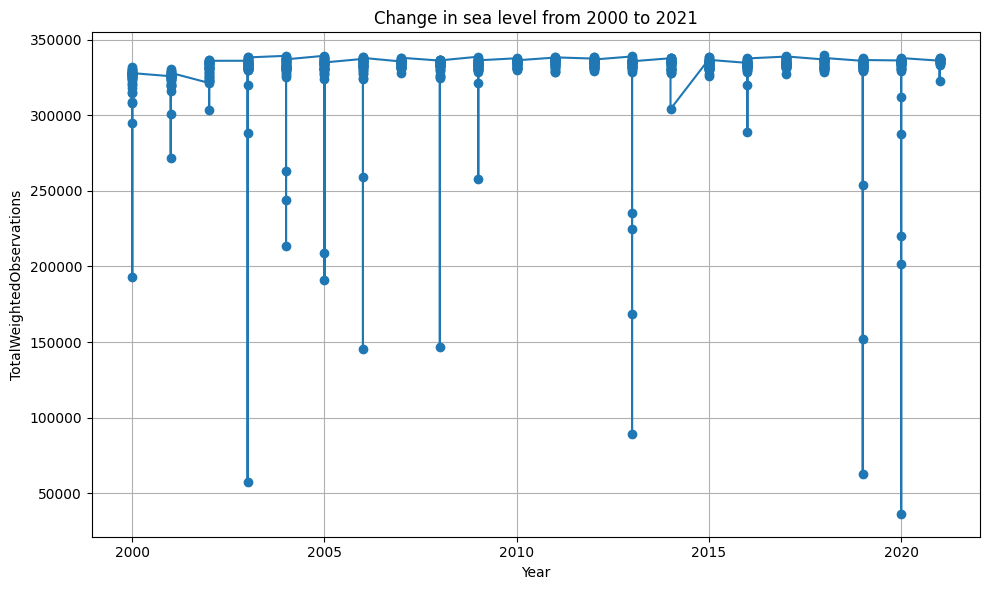

In [60]:
# Displaying data on change in sea level from year 2000 to 2021

import matplotlib.pyplot as plt

# Set the pandas option to limit the number of rows displayed
pd.set_option('display.max_rows', 10)  # Shows 5 rows from the beginning and 5 from the end by default

# Filter the dataframe 'df_sea_level' for the years 2000 to 2021
df_sea_level_filtered = df_sea_level[(df_sea_level['Year'] >= 2000) & (df_sea_level['Year'] <= 2021)]

# Select only the 'Year' and 'TotalWeightedObservations' columns
df_sea_level_years = df_sea_level_filtered[['Year', 'TotalWeightedObservations']]

# Displaying the caption
print("Change in sea level")

# Displaying the DataFrame without the index and with limited rows
display(df_sea_level_years.set_index('Year'))

# Plotting 'Year' against 'TotalWeightedObservations'
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(df_sea_level_years['Year'], df_sea_level_years['TotalWeightedObservations'], marker='o', linestyle='-')
plt.title('Change in sea level from 2000 to 2021')
plt.xlabel('Year')
plt.ylabel('TotalWeightedObservations')
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

Northern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies Globally
 Year    J-D    D-N
 2000 0.0050 0.0053
 2001 0.0064 0.0061
 2002 0.0071 0.0073
 2003 0.0075 0.0070
 2004 0.0066 0.0070
 2005 0.0086 0.0082
 2006 0.0082 0.0079
 2007 0.0085 0.0088
 2008 0.0068 0.0069
 2009 0.0072 0.0072
 2010 0.0090 0.0091
 2011 0.0074 0.0071
 2012 0.0081 0.0085
 2013 0.0080 0.0076
 2014 0.0092 0.0089
 2015 0.0117 0.0114
 2016 0.0131 0.0135
 2017 0.0117 0.0114
 2018 0.0103 0.0105
 2019 0.0120 0.0118
 2020 0.0135 0.0136
 2021 0.0114 0.0114


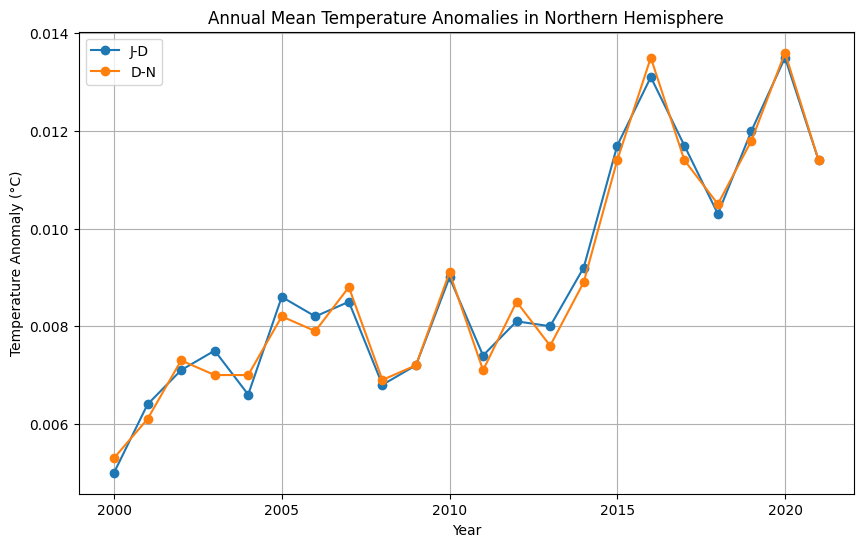

In [58]:
# Displaying data about Northern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies Globally
# Values in the dataset are given as temperature anomalies in hundredths of a degree Celsius

# df_northern_hemisphere is the DataFrame containing the data

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connecting to the SQLite database
pipeline = sqlite3.connect(r"D:\Documents\MS_COURSES\MADE\made-template\data\autopipeline.sqlite")

# Reading the data from the SQLite database
df_northern_hemisphere = pd.read_sql_query('SELECT * FROM "Northern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies"', pipeline)

# Closing the database connection
pipeline.close()

# Set the column names to the values in the second row (index 1) and then drop the first two rows
df_northern_hemisphere.columns = df_northern_hemisphere.iloc[1]
df_northern_hemisphere = df_northern_hemisphere.drop(df_northern_hemisphere.index[0:2]).reset_index(drop=True)

# Convert the 'Year' column to numeric
df_northern_hemisphere['Year'] = pd.to_numeric(df_northern_hemisphere['Year'], errors='coerce')

# Convert 'J-D' and 'D-N' to numeric and divide by 100 to convert to Celsius
df_northern_hemisphere['J-D'] = pd.to_numeric(df_northern_hemisphere['J-D'], errors='coerce') / 100
df_northern_hemisphere['D-N'] = pd.to_numeric(df_northern_hemisphere['D-N'], errors='coerce') / 100

# Multiply by -1 for values that were negative in the original data
df_northern_hemisphere['J-D'] = df_northern_hemisphere['J-D'] * df_northern_hemisphere['J-D'].apply(lambda x: -1 if x < 0 else 1)
df_northern_hemisphere['D-N'] = df_northern_hemisphere['D-N'] * df_northern_hemisphere['D-N'].apply(lambda x: -1 if x < 0 else 1)


# Filter the DataFrame for years 2000 to 2021
df_northern_hemisphere_filtered = df_northern_hemisphere[(df_northern_hemisphere['Year'] >= 2000) & (df_northern_hemisphere['Year'] <= 2021)]

# Selecting only the 'Year', 'J-D', and 'D-N' columns for display
df_northern_hemisphere_selected_columns = df_northern_hemisphere_filtered[['Year', 'J-D', 'D-N']]

# Printing the DataFrame without the index
print("Northern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies Globally")
print(df_northern_hemisphere_selected_columns.to_string(index=False))


# Plotting the annual mean temperature values for J-D
plt.figure(figsize=(10, 6))
plt.plot(df_northern_hemisphere_selected_columns['Year'], df_northern_hemisphere_selected_columns['J-D'], label='J-D', marker='o')

# Plotting the annual mean temperature values for D-N
plt.plot(df_northern_hemisphere_selected_columns['Year'], df_northern_hemisphere_selected_columns['D-N'], label='D-N', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Annual Mean Temperature Anomalies in Northern Hemisphere')
plt.legend()  # Displaying legend

# Displaying the plot
plt.grid(True)
plt.show()




Southern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies Globally
 Year    J-D    D-N
 2000 0.0029 0.0027
 2001 0.0043 0.0042
 2002 0.0054 0.0054
 2003 0.0049 0.0049
 2004 0.0041 0.0041
 2005 0.0050 0.0050
 2006 0.0046 0.0046
 2007 0.0047 0.0049
 2008 0.0040 0.0038
 2009 0.0059 0.0057
 2010 0.0055 0.0057
 2011 0.0047 0.0048
 2012 0.0049 0.0046
 2013 0.0055 0.0056
 2014 0.0057 0.0058
 2015 0.0063 0.0060
 2016 0.0073 0.0074
 2017 0.0067 0.0069
 2018 0.0066 0.0064
 2019 0.0075 0.0074
 2020 0.0068 0.0072
 2021 0.0056 0.0054


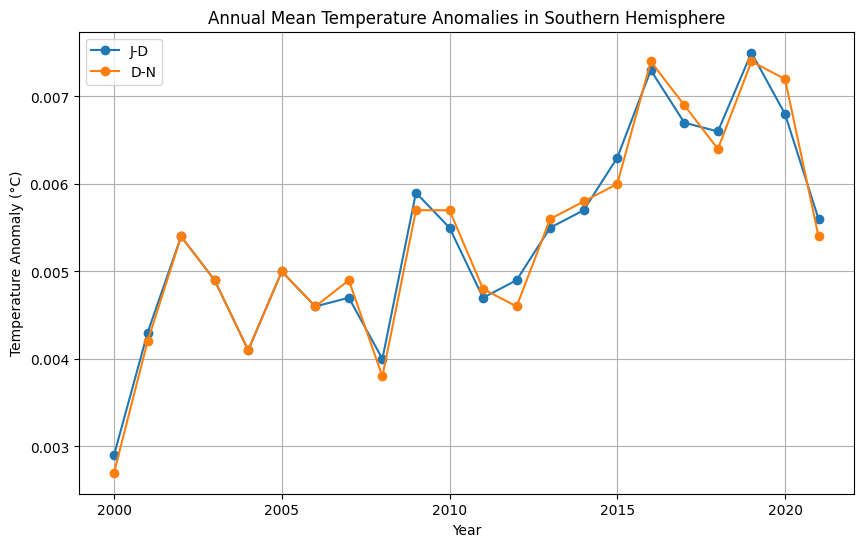

In [61]:
# Displaying data about Southern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies Globally
# Values in the dataset are given as temperature anomalies in hundredths of a degree Celsius
# We have to convert it to degree celsius

# df_southern_hemisphere is the DataFrame containing the data

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connecting to the SQLite database
pipeline = sqlite3.connect(r"D:\Documents\MS_COURSES\MADE\made-template\data\autopipeline.sqlite")

# Reading the data from the SQLite database
df_southern_hemisphere = pd.read_sql_query('SELECT * FROM "Southern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies"', pipeline)

# Closing the database connection
pipeline.close()

# Set the column names to the values in the second row (index 1) and then drop the first two rows
df_southern_hemisphere.columns = df_southern_hemisphere.iloc[1]
df_southern_hemisphere = df_southern_hemisphere.drop(df_southern_hemisphere.index[0:2]).reset_index(drop=True)

# Converting the 'Year' column to numeric
df_southern_hemisphere['Year'] = pd.to_numeric(df_southern_hemisphere['Year'], errors='coerce')

# Converting 'J-D' and 'D-N' to numeric and divide by 100 to convert to Celsius
df_southern_hemisphere['J-D'] = pd.to_numeric(df_southern_hemisphere['J-D'], errors='coerce') / 100
df_southern_hemisphere['D-N'] = pd.to_numeric(df_southern_hemisphere['D-N'], errors='coerce') / 100

# Multiply by -1 for values that were negative in the original data
df_southern_hemisphere['J-D'] = df_southern_hemisphere['J-D'] * df_southern_hemisphere['J-D'].apply(lambda x: -1 if x < 0 else 1)
df_southern_hemisphere['D-N'] = df_southern_hemisphere['D-N'] * df_southern_hemisphere['D-N'].apply(lambda x: -1 if x < 0 else 1)

# Filter the DataFrame for years 2000 to 2021
df_southern_hemisphere_filtered = df_southern_hemisphere[(df_southern_hemisphere['Year'] >= 2000) & (df_southern_hemisphere['Year'] <= 2021)]

# Select only the 'Year', 'J-D', and 'D-N' columns for display
df_southern_hemisphere_selected_columns = df_southern_hemisphere_filtered[['Year', 'J-D', 'D-N']]

# Print the DataFrame withingout the index
print("Southern Hemisphere-Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies Globally")
print(df_southern_hemisphere_selected_columns.to_string(index=False))

# Plotting the annual mean temperature values for J-D
plt.figure(figsize=(10, 6))
plt.plot(df_southern_hemisphere_selected_columns['Year'], df_southern_hemisphere_selected_columns['J-D'], label='J-D', marker='o')

# Plotting the annual mean temperature values for D-N
plt.plot(df_southern_hemisphere_selected_columns['Year'], df_southern_hemisphere_selected_columns['D-N'], label='D-N', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Annual Mean Temperature Anomalies in Southern Hemisphere')
plt.legend()  # Displaying legend

# Displaying the plot
plt.grid(True)
plt.show()


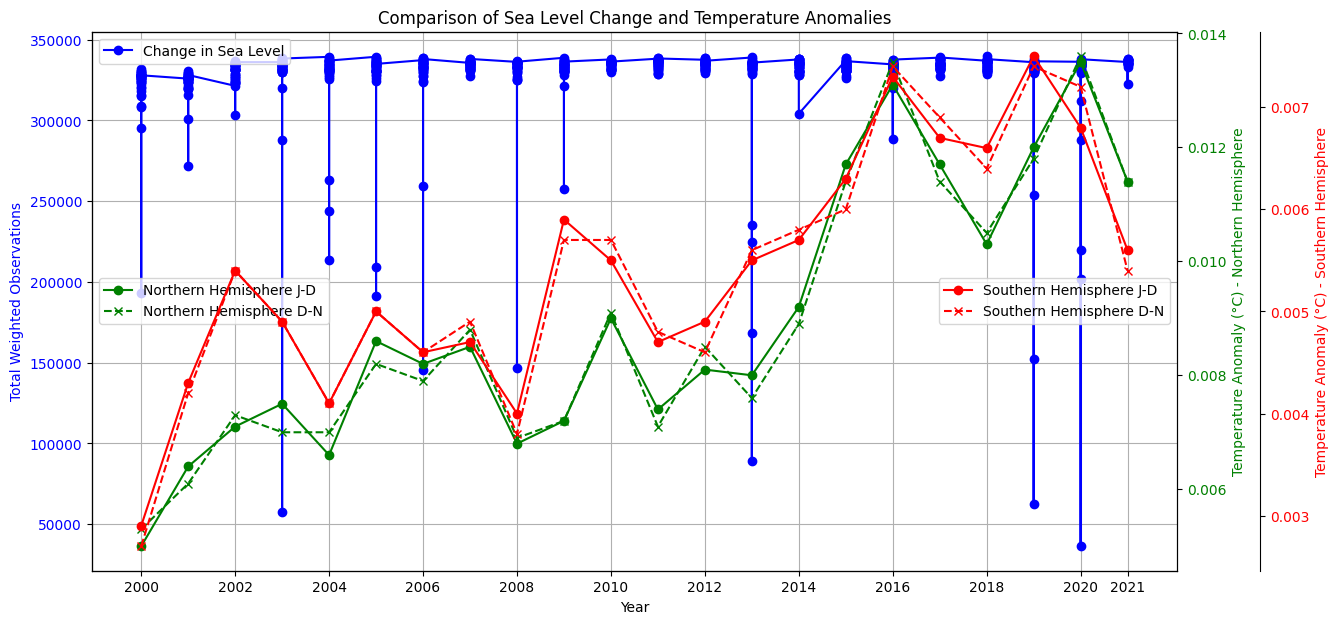

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(14, 7))

# Define the specific years you want to display on the x-axis
years_to_display = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2021]

# Set the x-axis to only display these years
ax1.set_xticks(years_to_display)
ax1.set_xticklabels(years_to_display)

# # Set the locator for the x-axis to show only 10 ticks
# ax1.xaxis.set_major_locator(ticker.MaxNLocator(10))

# Plotting Change in sea level on the primary y-axis (ax1)
ax1.plot(df_sea_level_years['Year'], df_sea_level_years['TotalWeightedObservations'], color='b', marker='o', label='Change in Sea Level')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Weighted Observations', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis (ax2) for Northern Hemisphere temperature anomalies
ax2 = ax1.twinx()
ax2.plot(df_northern_hemisphere_selected_columns['Year'], df_northern_hemisphere_selected_columns['J-D'], color='g', marker='o', label='Northern Hemisphere J-D')
ax2.plot(df_northern_hemisphere_selected_columns['Year'], df_northern_hemisphere_selected_columns['D-N'], color='g', marker='x', linestyle='--', label='Northern Hemisphere D-N')
ax2.set_ylabel('Temperature Anomaly (°C) - Northern Hemisphere', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='center left')

# Creating a third y-axis (ax3) for Southern Hemisphere temperature anomalies
ax3 = ax1.twinx()
# Offset the third y-axis to the right
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df_southern_hemisphere_selected_columns['Year'], df_southern_hemisphere_selected_columns['J-D'], color='r', marker='o', label='Southern Hemisphere J-D')
ax3.plot(df_southern_hemisphere_selected_columns['Year'], df_southern_hemisphere_selected_columns['D-N'], color='r', marker='x', linestyle='--', label='Southern Hemisphere D-N')
ax3.set_ylabel('Temperature Anomaly (°C) - Southern Hemisphere', color='r')
ax3.tick_params(axis='y', labelcolor='r')
ax3.legend(loc='center right')

# Adding title and grid
plt.title('Comparison of Sea Level Change and Temperature Anomalies')
ax1.grid(True)

# Showing plot
plt.show()


# Question:

1. Is there a statistically significant correlation between global sea level change and global surface temperature change from 2000 to 2021 ?

# Conclusion:

The plot provided attempts to compare sea level changes with temperature anomalies in the Northern and Southern Hemispheres over the period from 2000 to 2021. From a visual inspection of this plot, one might observe the following:

Trends: It appears that both the sea level and temperature anomalies show an upward trend over the two decades. This suggests that sea levels and temperatures might be increasing over time.

Variability: There is variability in the data from year to year, with some years showing higher or lower values than others. This variability is normal in climate data due to the complex interplay of various factors that influence climate.

Comparison: When looking at the overall patterns, there might be some years where both sea level rise and temperature anomalies increase together, while in other years, they do not appear to follow the same trend.

However, to draw a scientifically valid conclusion about a statistically significant correlation between global sea level change and global surface temperature change, a visual inspection is not sufficient. You would need to perform a statistical analysis, such as calculating the correlation coefficient (e.g., Pearson's r) between the two datasets. A correlation coefficient is a quantitative measure that indicates the extent to which two variables fluctuate together.

In [77]:
import pandas as pd
import scipy.stats as stats
import sqlite3

# Assuming 'Year' is already a column in all three dataframes and the dataframes have been loaded correctly

# Convert 'Year' column to string in all dataframes to ensure consistent merge
df_sea_level_years['Year'] = df_sea_level_years['Year'].astype(str)
df_northern_hemisphere_selected_columns['Year'] = df_northern_hemisphere_selected_columns['Year'].astype(str)
df_southern_hemisphere_selected_columns['Year'] = df_southern_hemisphere_selected_columns['Year'].astype(str)

# Merge the sea level data with the northern hemisphere data
df_combined_north = pd.merge(df_sea_level_years, df_northern_hemisphere_selected_columns, on='Year', suffixes=('_sea', '_north'))

# Merge the combined northern hemisphere data with the southern hemisphere data
df_combined = pd.merge(df_combined_north, df_southern_hemisphere_selected_columns, on='Year')

# Calculate the Pearson correlation coefficients using the correct column names
correlation_sealevel_north_JD, p_value_sealevel_north_JD = stats.pearsonr(
    df_combined['TotalWeightedObservations'], df_combined['J-D_x'])  # Northern Hemisphere

correlation_sealevel_south_JD, p_value_sealevel_south_JD = stats.pearsonr(
    df_combined['TotalWeightedObservations'], df_combined['J-D_y'])  # Southern Hemisphere

print("Pearson correlation coefficient (sea level vs Northern Hemisphere J-D):", correlation_sealevel_north_JD)
print("P-value:", p_value_sealevel_north_JD)

print("Pearson correlation coefficient (sea level vs Southern Hemisphere J-D):", correlation_sealevel_south_JD)
print("P-value:", p_value_sealevel_south_JD)


C:\Users\soura\AppData\Local\Temp\ipykernel_10332\2046753859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sea_level_years['Year'] = df_sea_level_years['Year'].astype(str)
C:\Users\soura\AppData\Local\Temp\ipykernel_10332\2046753859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_northern_hemisphere_selected_columns['Year'] = df_northern_hemisphere_selected_columns['Year'].astype(str)
C:\Users\soura\AppData\Local\Temp\ipykernel_10332\2046753859.py:10: SettingWithCopyWarning: 
A value is tryi

Pearson correlation coefficient (sea level vs Northern Hemisphere J-D): 0.02406378431969369
P-value: 0.4994304683883507
Pearson correlation coefficient (sea level vs Southern Hemisphere J-D): 0.026912559819864873
P-value: 0.4500277689580637


# Scope for Improvement

Based on these results, there is no statistically significant correlation between global sea level changes and global surface temperature anomalies in either the Northern Hemisphere or the Southern Hemisphere from 2000 to 2021. The correlation coefficients are very close to zero, and the p-values are well above the typical threshold of 0.05 for statistical significance.

It is important to note that correlation does not imply causation. Additionally, these results are based on the specific datasets and time period analyzed. Other factors, including the specific nature of the data, data quality, and external influences, could also impact these findings. For a more comprehensive understanding, further analysis involving additional variables, longer time periods, and different methodologies might be necessary.